In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'July 2018'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16
2017-10-31     2027   2004         58   35   0     8     84     193      14
2017-11-30     1930   1669         54   11   0     2     85     183      15
2017-12-31     2375   2035         45   11   0     2     89     110      11
2018-01-31     2477   1881         32    5   0     1     74     136      12
2018-02-28     2527   1625         44    7   0     3    121     130      16
2018-03-31     2568   1997         51    6   0    10     79     197      12
2018-04-30     2359   2410         74    5   0     1     56     129       9
2018-05-31     2166   2355         65    4   0     1     42     131      12
2018-06-30     2361   2369         32    3   0     7     64     150      17
2018-07-31     2435   2513         69    1   0     7     51     184       7

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-07-31       74    144         37  -2   0     0    -13      34     -10

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

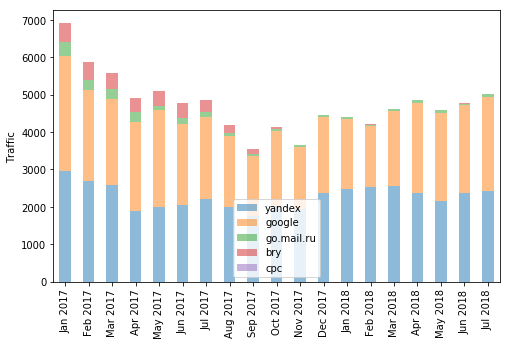

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

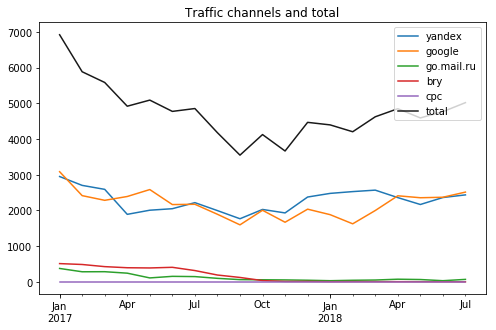

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                  тук тук двери Москва      1
go.mail.ru 0                                             (not set)     69
google     0                                         дешевые двери    278
           1                                       двери из дерева    251
           2                                          двери дешево    246
           3                             np - /?cnt=catalog&r=2438    167
           4                             np - /?cnt=catalog&r=1428    114
           5                                      np - /?pid=pokaz     82
           6                                                np - /     70
           7                                         двери продажа     50
           8                                дверное полотно дешево     23
           9                                     полотно для двери     18
           10                               дверные полотна купить     10
           11                            np - /?cnt=catalog&r=3124      8
           12                             np - /?cnt=catalog&r=379      8
           13                              np - /?pid=menu-katalog      8
           14                             np - /?cnt=catalog&r=497      7
           15                                        двери полотно      7
           16                                       двери в ванную      6
           17                             np - /?cnt=catalog&r=300      5
           18                            np - /?cnt=catalog&r=1792      4
           19                            np - /?cnt=catalog&r=2966      4
           20                             np - /?cnt=catalog&r=999      4
           21                                     двери с коробкой      4
           22                                        полотно двери      4
           23                             np - /?cnt=catalog&r=114      3
           24                            np - /?cnt=catalog&r=1458      3
           25                             np - /?cnt=catalog&r=152      3
           26                            np - /?cnt=catalog&r=2963      3
           27                             np - /?cnt=catalog&r=448      3
...                                                            ...    ...
yandex     2117  двери эмаль слоновая кость в интерьере дверь д...      1
           2118  двери эмаль слоновая кость в интерьере корфу э...      1
           2119  двери эмаль слоновая кость в интерьере олимп ц...      1
           2120  двери эмаль слоновая кость в интерьере остекле...      1
           2121  двери эмаль слоновая кость в интерьере что пре...      1
           2122  двери эмаль слоновая кость или кремовая в инте...      1
           2123  двери эмаль слоновая кость или кремовая купить...      1
           2124                  двери эмаль слоновая кость купить      1
           2125          двери эмаль слоновая кость с патиной фото      1
           2126                    двери эмаль со скрытыми петлями      1
           2127                                 двери эмаль состав      1
           2128                            двери эмаль состаренная      1
           2129  двери эмаль состаренная дверь массив дуба арт ...      1
           2130  двери эмаль состаренная межкомнатные и входные...      1
           2131                          двери эмаль фотография 10      1
           2132                                  двери эстет эмаль      1
           2133                                    дверка кухонная      1
           2134                  дверка кухонная открываться вверх      1
           2135                    дверка фасадная 50 см для кухни      1
           2136                         дверки в дырочку для кухни      1
           2137                                   дверки для кухни      1
           2138    дверки для кухни купить отдельно в леруа мерлен      1
           2139      дверки для уличной кухни из нержавеющей ст

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
bing,тук тук двери Москва,1
go.mail.ru,(not set),69
google,дешевые двери,278
yandex,(not set),67


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0             тук тук двери Москва      1
go.mail.ru 0                        (not set)     69
google     0                    дешевые двери    278
           1                  двери из дерева    251
           2                     двери дешево    246
           3        np - /?cnt=catalog&r=2438    167
           4        np - /?cnt=catalog&r=1428    114
yandex     0                        (not set)     67
           5                  дверное полотно     15
           6                  двери для кухни     13
           7  дверное полотно 800х2000 купить     12
           9     купить арку на дверной проем      9